## Building and Training the Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255, test_images / 255

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print("Training:",train_images.shape)
print("Testing:",test_images.shape)

Training: (50000, 32, 32, 3)
Testing: (10000, 32, 32, 3)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

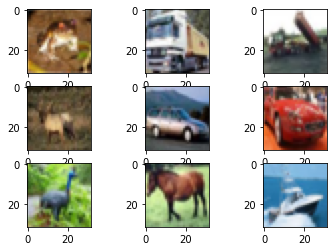

In [5]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(train_images[i])
plt.show()

In [6]:
#Setup data augmentation
traingen = ImageDataGenerator(
    rotation_range=0,
    horizontal_flip=True,
    vertical_flip=False,
    width_shift_range=0.15,
    height_shift_range=0.15
    )
traingen.fit(train_images)

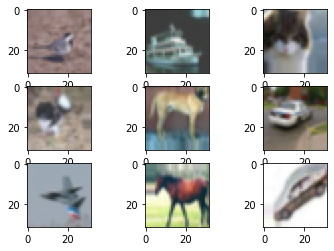

In [7]:
#Show example augmented images
for X_batch, y_batch in traingen.flow(train_images, train_labels, batch_size=9):
    for i in range(0,9):
        plt.subplot(330+1+i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [8]:
exModel = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', 
                  name='3x3_11', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same', 
                  name='3x3_12'),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', strides=[2,2], 
                  name='poolconv_1'),
    layers.Dropout(0.5),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  name='3x3_21'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  name='3x3_22'),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', strides=[2,2], 
                  name='poolconv_2'),
    layers.Dropout(0.5),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same', 
                  name='3x3_31'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same', 
                  name='3x3_32'),
    #layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', strides=[2,2], 
                  name='poolconv_3'),
    layers.Dropout(0.5),
    
    layers.Conv2D(128, (3,3), activation='relu', padding='same', 
                  name='3x3_4'),
    layers.Conv2D(128, (1,1), activation='relu', padding='valid', 
                  name='1x1_1'),
    layers.Conv2D(10, (1,1), activation='relu', padding='valid', 
                  name='1x1_2'),
    layers.GlobalAveragePooling2D(),
    layers.Activation('softmax')
], name = "conv_model")

In [9]:
exModel.summary()

Model: "conv_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
3x3_11 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
3x3_12 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
poolconv_1 (Conv2D)          (None, 15, 15, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
3x3_21 (Conv2D)              (None, 15, 15, 64)        18496     
_________________________________________________________________
3x3_22 (Conv2D)              (None, 15, 15, 64)        36928     
_________________________________________________________________
poolconv_2 (Conv2D)          (None, 7, 7, 64)          3

In [10]:
opt = tf.keras.optimizers.SGD(lr=0.02, momentum=0.8, decay=5e-8)

exModel.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
BATCHSIZE = 100
EPOCHS = 150

# Without Augment
#history = exModel.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCHSIZE,
#                         validation_data=(test_images, test_labels))

# With Augment
history = exModel.fit(traingen.flow(train_images, train_labels, batch_size=BATCHSIZE), 
                         epochs=EPOCHS, validation_data=(test_images, test_labels))


Epoch 1/150
500/500 [==============================] - 18s 35ms/step - loss: 2.3026 - accuracy: 0.0765 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 2/150
500/500 [==============================] - 18s 36ms/step - loss: 2.3026 - accuracy: 0.1057 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 3/150
500/500 [==============================] - 17s 35ms/step - loss: 2.3026 - accuracy: 0.0954 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 4/150
500/500 [==============================] - 18s 35ms/step - loss: 2.3026 - accuracy: 0.1623 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 5/150
500/500 [==============================] - 18s 35ms/step - loss: 2.3025 - accuracy: 0.1611 - val_loss: 2.3025 - val_accuracy: 0.0000e+00
Epoch 6/150
500/500 [==============================] - 18s 35ms/step - loss: 2.3025 - accuracy: 0.3509 - val_loss: 2.3025 - val_accuracy: 0.0000e+00
Epoch 7/150
500/500 [==============================] - 18s 35ms/step - loss: 2.3024 - accuracy: 0.3269 - v

KeyboardInterrupt: 

313/313 - 1s - loss: 1.9126 - accuracy: 0.1153


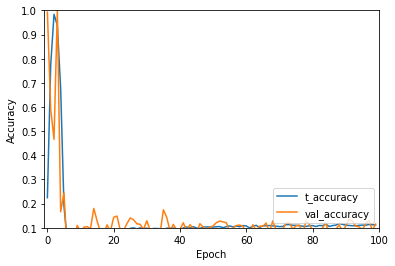

In [12]:
plt.plot(history.history['accuracy'], label='t_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.xlim([-1, 100])
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = exModel.evaluate(test_images,  test_labels, verbose=2)

In [13]:
exModel.save("exCifar10")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: exCifar10/assets


## Loading and Evaluating the Model

In [17]:
cifar10model = models.load_model("exCifar10")

In [18]:
t1 = time.time()
loss, acc = cifar10model.evaluate(test_images, test_labels, verbose=2)
t2 = time.time()

print("elapsed:", (t2-t1)*1000, "ms")
print("average:", (t2-t1)*1000/(test_images.shape[0]), "ms")

313/313 - 1s - loss: 1.9126 - accuracy: 0.1153
elapsed: 1040.0927066802979 ms
average: 0.10400927066802979 ms
